# Viewing the contents of an SLS-PS simulation file

In [1]:
from SLSPS_Simulations import *
import matplotlib.pyplot as plt
%matplotlib inline

Read-in one SLS-PS simulation file containing the results from one realization of the simulated "Optimized" survey version.

In [2]:
self = loadpickle('Simulations/SLSPS_Optimized')

Other survey versions include "Closest", "Large", "Short", "Degraded", and "Dark". For descriptions of these survey versions see Sect. 13 in Cloutier et al 2018 (link to paper). An SLS-PS simulation file from a single realization of each survey version can be loaded from the corresponding file called

    Simulations/SLSPS_suffix
    
where "suffix" should be replaced with one of the aforementioned survey version names. I.e.

In [3]:
% ls ./Simulations

SLSPS_Closest    SLSPS_Degraded   SLSPS_Optimized
SLSPS_Dark       SLSPS_Large      SLSPS_Short


## Summary of available parameters

Descriptions of all stellar pararmeters and their units can be accessed via

In [18]:
for key in np.sort(self.descriptions_star.keys()):
    print '%-*s = %s [%s]'%(7, key, self.descriptions_star[key], self.units_star[key])

HZPlims = habitable zone orbital period limits [days]
I       = stellar spin-axis inclination to the line-of-sight [deg]
Jmag    = J-band magnitude []
Ms      = stellar mass [solar masses]
Prot    = rotation period [days]
Rs      = stellar radius [solar radii]
SpT     = numerical spectral type []
Teff    = effective temperature [kelvin]
dist    = distance [parsecs]
fB      = magnetic field strength [kiloGauss]
vsini   = projected rotation velocity [km/s]


Similarly for the planetary system parameters

In [22]:
for key in np.sort(self.descriptions_planet.keys()):
    print '%-*s = %s [%s]'%(17, key, self.descriptions_planet[key], self.units_planet[key])

HZ_flags          = habitable zone flags [binary flag]
Ks                = RV semi-amplitudes [m/s]
Ps                = orbital periods [days]
T0s               = times of inferior conjuction [BJD]
albedos           = geometric albedos []
contrasts         = planet-star contrast []
detection_flags   = SPIRou detection flags [binary flag]
eccs              = orbital eccentricities []
imagable_flags    = potentially imagable planet flags [binary flag]
incs              = orbital inclinations to the plane of the sky [deg]
mps               = planetary masses [Earth masses]
mpsinis           = minimum planetary masses [Earth masses]
nplanets          = planet multiplicity []
nplanets_detected = number of planets detected in the system []
rps               = planetary radii [Earth radii]
seps              = projected separations [arcsec]
smas              = semi-major axes [AU]


And lastly for the remaining parameters which describe the properties of the simulated RV time-series 

In [23]:
for key in np.sort(self.descriptions_auxiliary.keys()):
    print '%-*s = %s [%s]'%(7, key, self.descriptions_auxiliary[key], self.descriptions_auxiliary[key])

nobs    = number of RV measurements [number of RV measurements]
sigmaRV = median RV measurement uncertainty [median RV measurement uncertainty]


## Visualization examples

Below are a suite of simple plotting examples intended to demonstrate the data included in each SLS-PS simulation file.

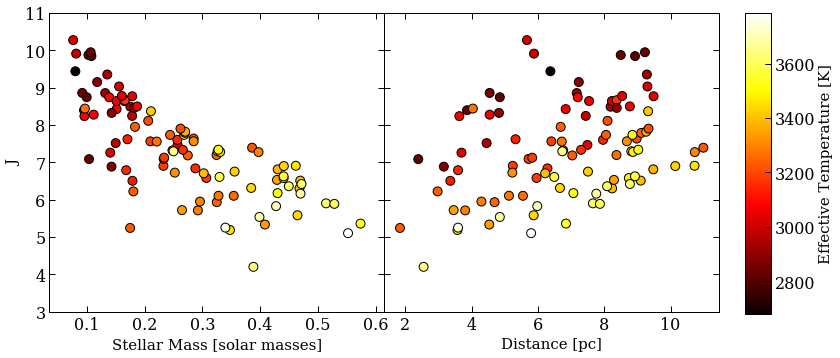

In [24]:
## plot stellar parameters from Fig 1 in Cloutier et al 2018
fig = plt.figure(figsize=(12,5.5))
ax1 = fig.add_subplot(121)
ax1.scatter(self.Ms, self.Jmag, c=self.Teff, s=80, cmap=plt.get_cmap('hot'), edgecolors='k')
ax1.set_xlabel('Stellar Mass [solar masses]'), ax1.set_ylabel('J'), ax1.set_ylim((3,11))

ax2 = fig.add_subplot(122)
im = ax2.scatter(self.dist, self.Jmag, c=self.Teff, s=80, cmap=plt.get_cmap('hot'), edgecolors='k')
cbar_ax = fig.add_axes([.93, .12, .03, .76])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Effective Temperature [K]')
ax2.set_xlabel('Distance [pc]'), ax2.set_yticklabels(''), ax2.set_ylim((3,11))
fig.subplots_adjust(wspace=0)

((0, 200.0),
 <matplotlib.text.Text at 0x11948fe10>)

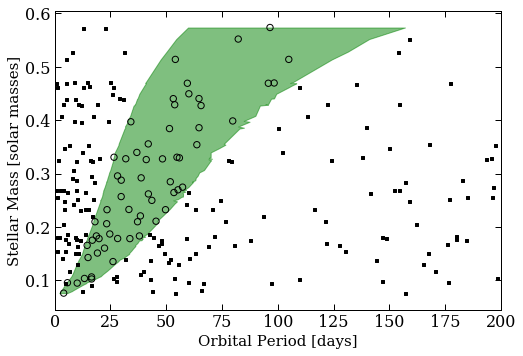

In [25]:
# plot the stellar HZ limits and planet population
fig = plt.figure(figsize=(8,5.5))
ax = fig.add_subplot(111)
sort = np.argsort(self.Ms)
ax.fill_betweenx(self.Ms[sort], self.HZPlims[sort,0], self.HZPlims[sort,1], color='g', alpha=.5)
inHZ = self.HZ_flags == 1
ax.scatter(self.Ps[inHZ], np.repeat(self.Ms, self.Ps.shape[1]).reshape(self.Nstar, self.Ps.shape[1])[inHZ], 
           facecolors='none', edgecolor='k', s=40)
outHZ = self.HZ_flags == 0
ax.scatter(self.Ps[outHZ], np.repeat(self.Ms, self.Ps.shape[1]).reshape(self.Nstar, self.Ps.shape[1])[outHZ], 
           c='k', s=9, marker='s')
ax.set_xlim((0,2e2)), ax.set_xlabel('Orbital Period [days]'), ax.set_ylabel('Stellar Mass [solar masses]')

/Users/ryancloutier/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in less
/Users/ryancloutier/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in greater
/Users/ryancloutier/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in greater_equal
/Users/ryancloutier/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in less_equal


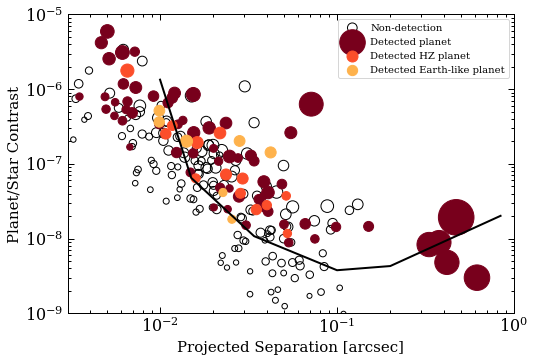

In [26]:
# planet population compared to the predicted contrast curve from EPICS/PFI (Fig 19 in Cloutier et al 2018)
fig = plt.figure(figsize=(8,5.5))
ax = fig.add_subplot(111)
g = self.detection_flags == 0
ax.scatter(self.seps[g], self.contrasts[g], facecolor='none', edgecolors='k', s=self.rps[g]*50, label='Non-detection')
g = (self.detection_flags == 1) & (self.HZ_flags == 0)
ax.scatter(self.seps[g], self.contrasts[g], c='#78001c', s=self.rps[g]*50, label='Detected planet')
g = (self.detection_flags == 1) & (self.HZ_flags == 1) & ((self.mps < 1) | (self.mps > 5))
ax.scatter(self.seps[g], self.contrasts[g], c='#fc4e2a', s=self.rps[g]*50, label='Detected HZ planet')
g = (self.detection_flags == 1) & (self.HZ_flags == 1) & (self.mps >= 1) & (self.mps <= 5)
ax.scatter(self.seps[g], self.contrasts[g], c='#feb24c', s=self.rps[g]*50, label='Detected Earth-like planet')
ax.plot([.01,.015,.034,.1,.2,.84], [1.34e-6,6.50e-8,1.08e-8,3.78e-9,4.30e-9,2.02e-8], 'k-')
ax.set_xlim((3e-3, 1)), ax.set_ylim((1e-9, 1e-5))
ax.set_xscale('log'), ax.set_yscale('log')
ax.set_xlabel('Projected Separation [arcsec]'), ax.set_ylabel('Planet/Star Contrast')
ax.legend(loc='upper right')